In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 25

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 40)                1720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                2

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
hist = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
126/126 [==============================] - 1s 4ms/step - loss: 3.1719 - accuracy: 0.0649 - val_loss: 2.7693 - val_accuracy: 0.1550

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
126/126 [==============================] - 0s 1ms/step - loss: 2.7001 - accuracy: 0.1643 - val_loss: 2.0891 - val_accuracy: 0.3669

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
126/126 [==============================] - 0s 1ms/step - loss: 2.1825 - accuracy: 0.2706 - val_loss: 1.5713 - val_accuracy: 0.5268

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
126/126 [==============================] - 0s 1ms/step - loss: 1.8201 - accuracy: 0.3566 - val_loss: 1.2749 - val_accuracy: 0.6019

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
126/126 [==============================] - 0s 1ms/step - loss: 1.6198 - accuracy: 0.407

126/126 [==============================] - 0s 1ms/step - loss: 0.7692 - accuracy: 0.7229 - val_loss: 0.3307 - val_accuracy: 0.9323

Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.7638 - accuracy: 0.7227 - val_loss: 0.3226 - val_accuracy: 0.9398

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.7726 - accuracy: 0.7226 - val_loss: 0.3300 - val_accuracy: 0.9162

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.7513 - accuracy: 0.7277 - val_loss: 0.3189 - val_accuracy: 0.9286

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.7210 - accuracy: 0.7430 - val_l

126/126 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.8045 - val_loss: 0.2245 - val_accuracy: 0.9528

Epoch 00073: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 74/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.8076 - val_loss: 0.2230 - val_accuracy: 0.9541

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.8088 - val_loss: 0.2216 - val_accuracy: 0.9503

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.5590 - accuracy: 0.8086 - val_loss: 0.2197 - val_accuracy: 0.9533

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.5451 - accuracy: 0.8105 - val_l

126/126 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.8338 - val_loss: 0.1879 - val_accuracy: 0.9554

Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 110/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.8419 - val_loss: 0.1975 - val_accuracy: 0.9483

Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8440 - val_loss: 0.1893 - val_accuracy: 0.9520

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.8355 - val_loss: 0.1891 - val_accuracy: 0.9552

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
126/126 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.8427 - v

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

42/42 [==============================] - 0s 487us/step - loss: 0.1894 - accuracy: 0.9531


In [32]:
val_acc

0.9531484246253967

In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.3162829e-09 4.3097503e-13 1.6394586e-04 4.5236640e-29 1.5711847e-16
 2.9053745e-13 2.8144668e-31 1.9513502e-13 1.2552929e-13 9.9192518e-01
 1.0023561e-13 5.6371846e-21 8.7166787e-18 2.3693065e-22 7.6053026e-03
 2.0807480e-19 7.9322441e-24 1.2427615e-25 6.1805665e-11 9.7027225e-07
 5.3595334e-31 2.1109775e-26 1.6518931e-36 5.0748450e-09 3.0468943e-04]
9


# Plot the results

In [43]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(124)


In [44]:
import matplotlib.pyplot as plt

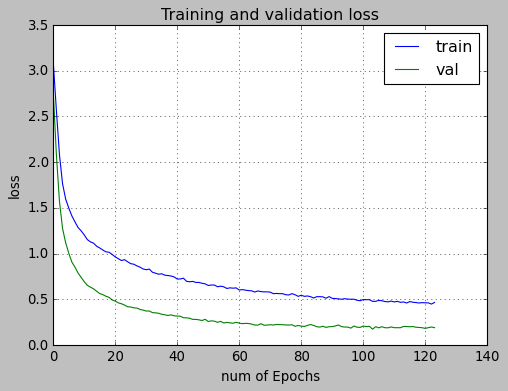

In [52]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

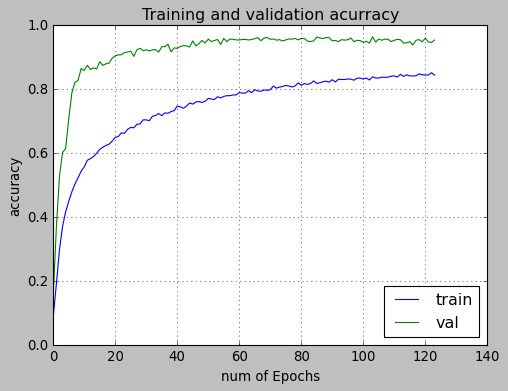

In [53]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('Training and validation acurracy')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# Confusion matrix

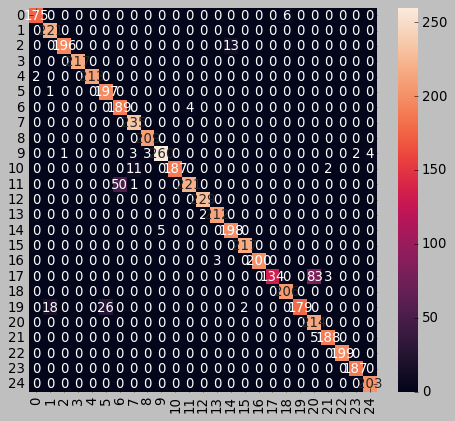

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       181
           1       0.92      1.00      0.96       221
           2       0.99      0.94      0.97       209
           3       1.00      1.00      1.00       217
           4       1.00      0.99      1.00       215
           5       0.88      0.99      0.94       198
           6       0.79      0.98      0.88       193
           7       0.94      1.00      0.97       235
           8       0.99      1.00      0.99       209
           9       0.98      0.95      0.97       273
          10       1.00      0.94      0.97       200
          11       0.98      0.81      0.89       272
          12       0.99      1.00      1.00       229
          13       0.99      0.99      0.99       214
          14       0.94      0.98      0.96       203
          15       0.99      1.00      1.00       217
          16       1.00      0.99      0.99       203
     

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [55]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [56]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Lucas\AppData\Local\Temp\tmpdsx7kkb_\assets


9456

# Inference test

In [57]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [58]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [59]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [60]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 2.02 ms


In [61]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.12038453e-09 3.02574562e-13 1.43798359e-04 1.83889973e-29
 1.08556973e-16 2.59176225e-13 1.71443371e-31 1.10842542e-13
 1.18493973e-13 9.92833018e-01 7.41864388e-14 4.13863825e-21
 7.22411571e-18 1.71073739e-22 6.67488435e-03 1.39538132e-19
 5.70993419e-24 4.71355176e-26 4.38616192e-11 9.50985793e-07
 1.79234359e-31 1.15038276e-26 7.83639463e-37 3.93258892e-09
 3.47387395e-04]
9
